#### **EDA**

##### **Missing Values**

In [16]:
print("Missing values in business dataset:\n", business_df.isnull().sum())
print("Missing values in review dataset:\n", restaurant_review_df.isnull().sum())
print("Missing values in user dataset:\n", restaurant_user_df.isnull().sum())
print("Missing values in checkin dataset:\n", restaurant_checkin_df.isnull().sum())
print("Missing values in tip dataset:\n", restaurant_tip_df.isnull().sum())

Missing values in business dataset:
 business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64
Missing values in review dataset:
 review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64
Missing values in user dataset:
 user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0


In [17]:
business_df['hours'].fillna("Not Provided", inplace=True)
business_df['attributes'].fillna("Unknown", inplace=True)
business_df['categories'].fillna(business_df['categories'].mode()[0], inplace=True)

<ipython-input-17-14ea53ea338d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  business_df['hours'].fillna("Not Provided", inplace=True)
<ipython-input-17-14ea53ea338d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

**Total Restaurants**

In [18]:
print("Total Restaurant Reviews:", restaurant_review_df.shape[0])
print("Total Restaurant Users:", restaurant_user_df.shape[0])
print("Total Restaurant Check-ins:", restaurant_checkin_df.shape[0])
print("Total Restaurant Tips:", restaurant_tip_df.shape[0])

Total Restaurant Reviews: 4724684
Total Restaurant Users: 1446025
Total Restaurant Check-ins: 51318
Total Restaurant Tips: 649181


##### **Business Data**

**Shape & Head**

In [19]:
print(f"Shape of business_df: {business_df.shape}")
business_df.head()

Shape of business_df: (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",Not Provided
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


**Numeric Columns Distribution**

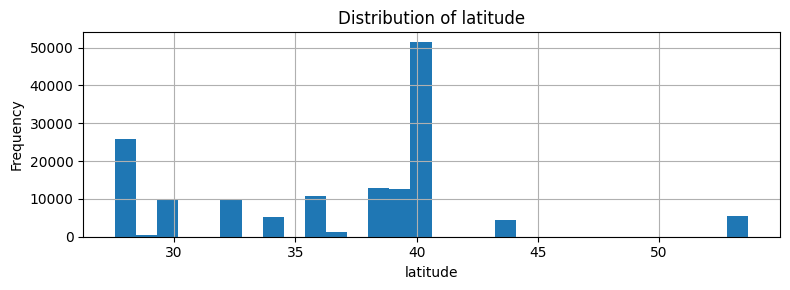

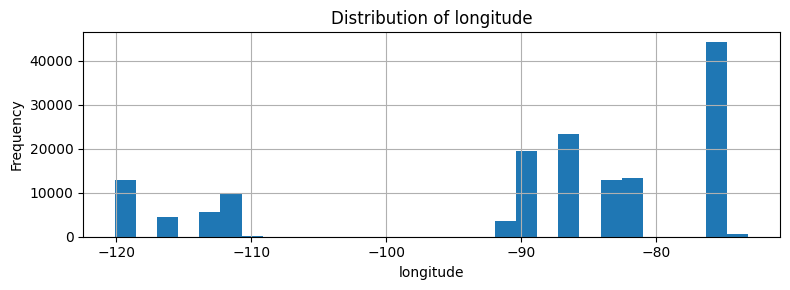

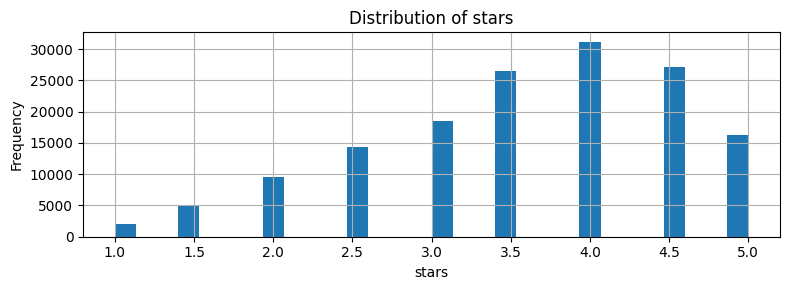

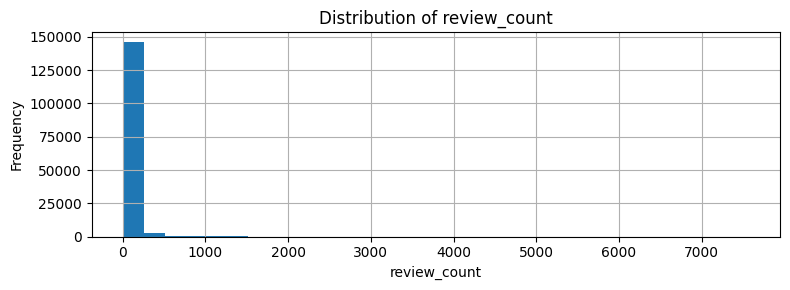

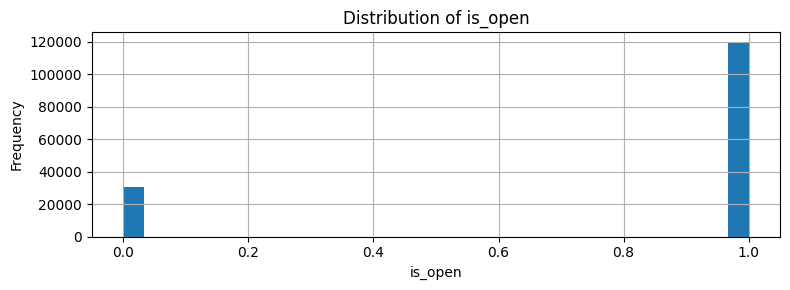

In [20]:
# in the business df
num_cols = business_df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(8, 3))
    business_df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

**Star Ratings Distribution**

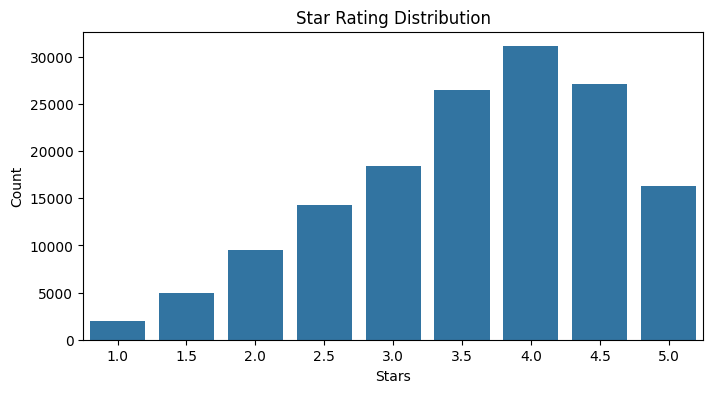

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x="stars", data=business_df, order=sorted(business_df['stars'].unique()))
plt.title("Star Rating Distribution")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

**Top 10 Cities with the Most Restaurants**

<ipython-input-22-a216a293e2ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='coolwarm')


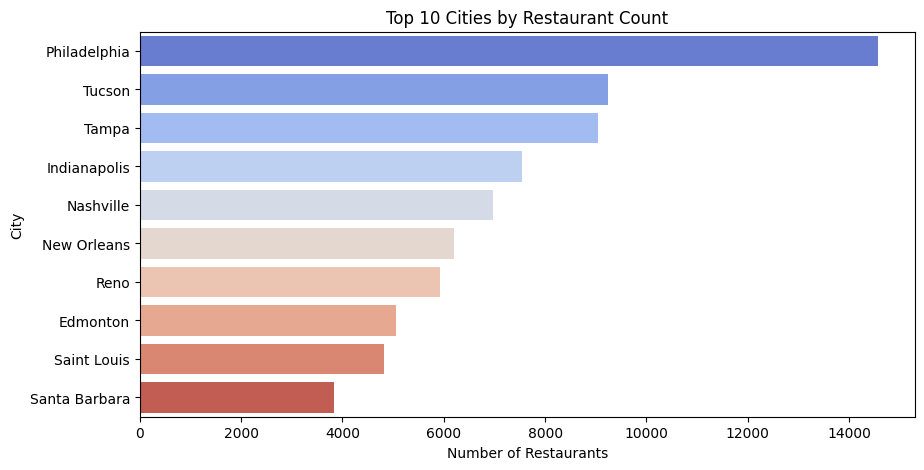

In [22]:
top_cities = business_df['city'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='coolwarm')
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

**Most Common Categories**

<ipython-input-23-cb0222e92954>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='magma')


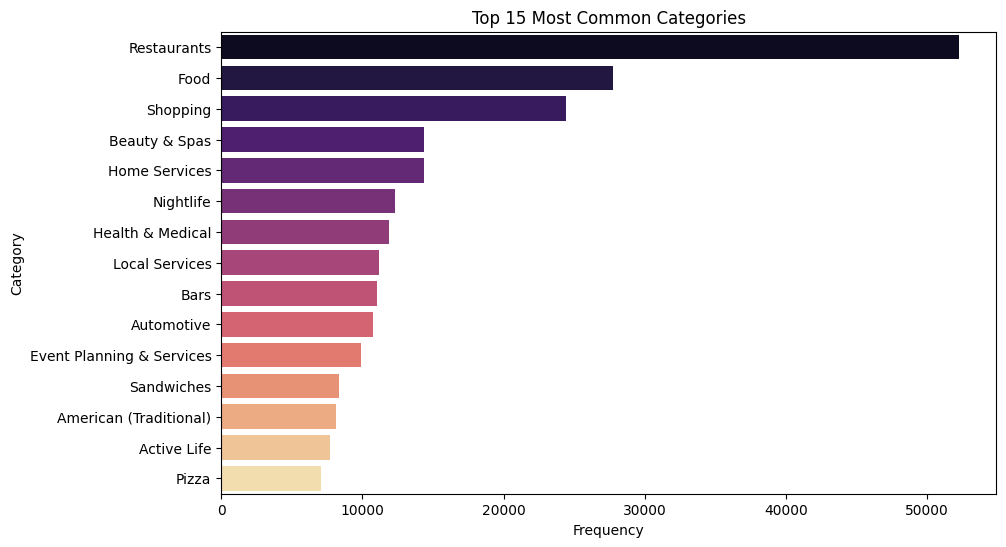

In [23]:
from collections import Counter
from itertools import chain

category_series = business_df['categories'].dropna().str.split(', ')
all_categories = list(chain.from_iterable(category_series))
category_counts = pd.Series(Counter(all_categories)).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='magma')
plt.title("Top 15 Most Common Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

##### **Reviews Dataset**

**Shape and Head**

In [24]:
print(f"Shape of restaurant_review_df: {restaurant_review_df.shape}")
restaurant_review_df.head()

Shape of restaurant_review_df: (4724684, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


**Star Rating Distribution**

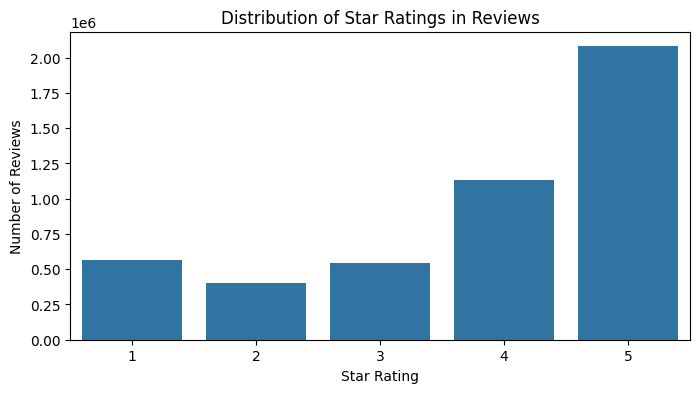

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(x='stars', data=restaurant_review_df, order=sorted(restaurant_review_df['stars'].unique()))
plt.title("Distribution of Star Ratings in Reviews")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.show()

**Review Length Distribution**

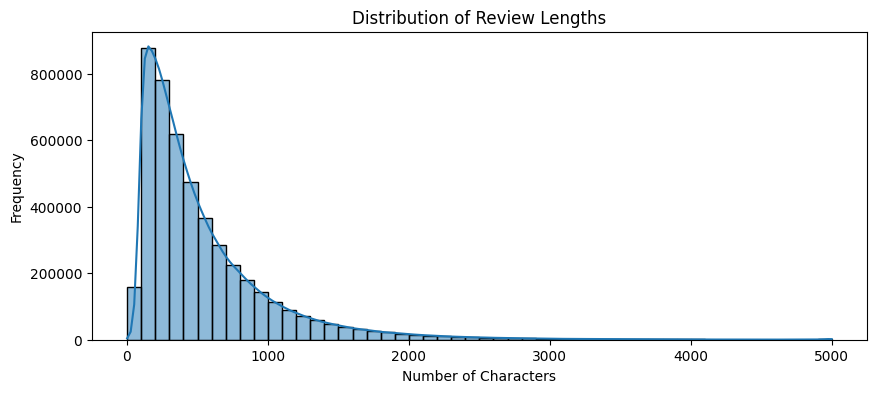

In [26]:
restaurant_review_df["review_length"] = restaurant_review_df["text"].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 4))
sns.histplot(restaurant_review_df["review_length"], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

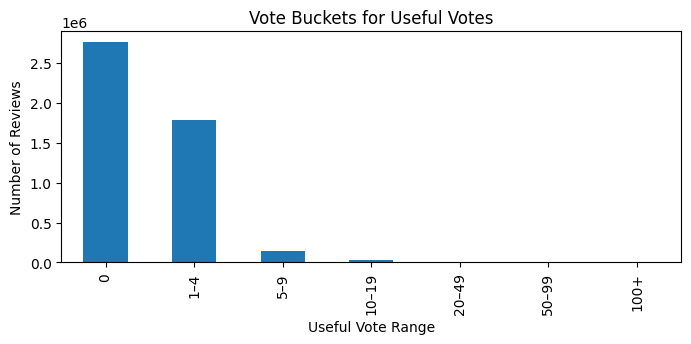

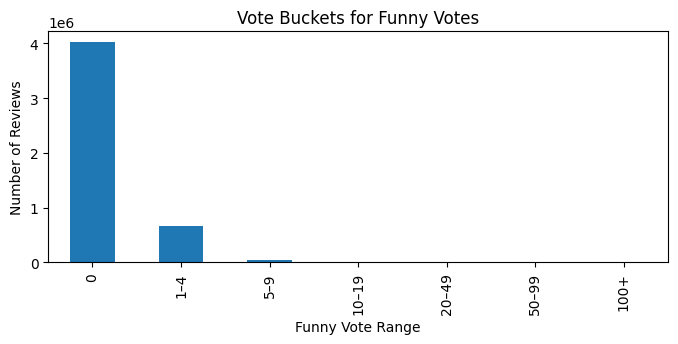

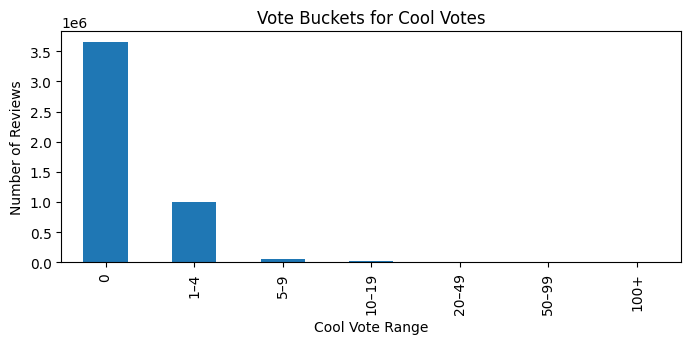

In [27]:
for col in ["useful", "funny", "cool"]:
    bins = [0, 1, 5, 10, 20, 50, 100, 1000]
    labels = ["0", "1–4", "5–9", "10–19", "20–49", "50–99", "100+"]
    bucketed = pd.cut(restaurant_review_df[col], bins=bins, labels=labels, right=False)

    plt.figure(figsize=(8, 3))
    bucketed.value_counts().sort_index().plot(kind='bar')
    plt.title(f"Vote Buckets for {col.title()} Votes")
    plt.xlabel(f"{col.title()} Vote Range")
    plt.ylabel("Number of Reviews")
    plt.show()

**Reviews Over Time**

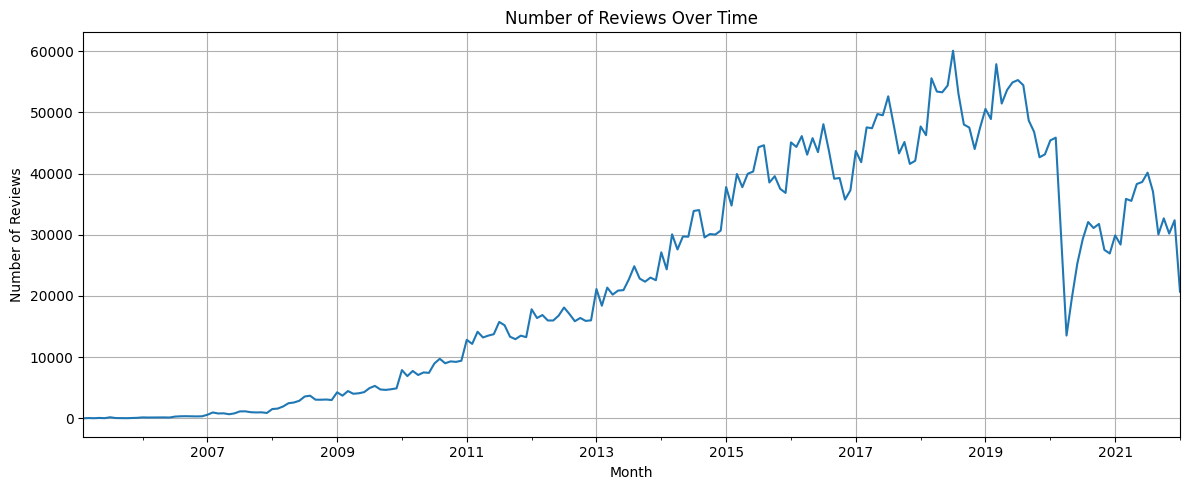

In [28]:
# converting date column to datetime
restaurant_review_df["date"] = pd.to_datetime(restaurant_review_df["date"], errors='coerce')


reviews_per_month = restaurant_review_df["date"].dt.to_period("M").value_counts().sort_index()
plt.figure(figsize=(12, 5))
reviews_per_month.plot()
plt.title("Number of Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()

##### **User Data**

**Shape & Head**

In [29]:
print(f"Shape: {restaurant_user_df.shape}")
restaurant_user_df.head()

Shape: (1446025, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


**Review Count Distribution**

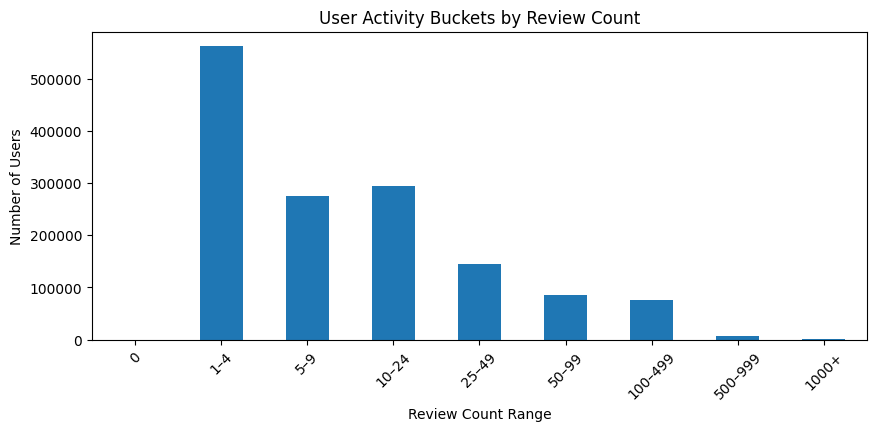

In [30]:
bins = [0, 1, 5, 10, 25, 50, 100, 500, 1000, 5000]
labels = ["0", "1–4", "5–9", "10–24", "25–49", "50–99", "100–499", "500–999", "1000+"]
bucketed = pd.cut(restaurant_user_df["review_count"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 4))
bucketed.value_counts().sort_index().plot(kind="bar")
plt.title("User Activity Buckets by Review Count")
plt.xlabel("Review Count Range")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

	•	The majority of Yelp users fall into the 1–4 review count range, indicating many are casual or one-time reviewers.
	•	Only a small fraction of users contribute heavily (100+ reviews), suggesting that a small core of power users generate a large portion of the content.

**Average Stars Distribution**

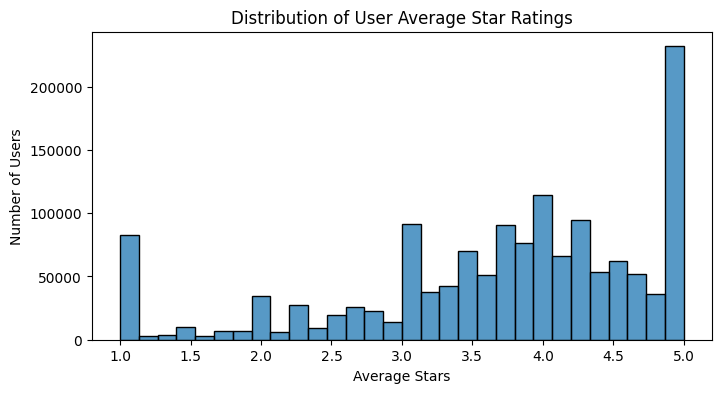

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(restaurant_user_df["average_stars"], bins=30)
plt.title("Distribution of User Average Star Ratings")
plt.xlabel("Average Stars")
plt.ylabel("Number of Users")
plt.show()

**User Registration Timeline**

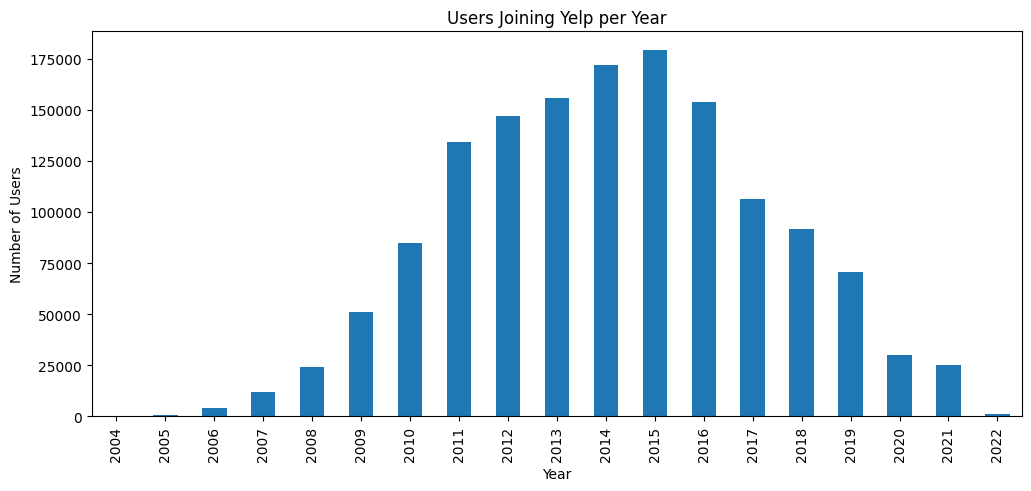

In [32]:
restaurant_user_df["yelping_since"] = pd.to_datetime(restaurant_user_df["yelping_since"], errors='coerce')

users_per_year = restaurant_user_df["yelping_since"].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 5))
users_per_year.plot(kind="bar")
plt.title("Users Joining Yelp per Year")
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.show()

**Compliment Columns Summary**

<ipython-input-33-7b45b84a414c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compliments_sum.index, y=compliments_sum.values, palette="rocket")


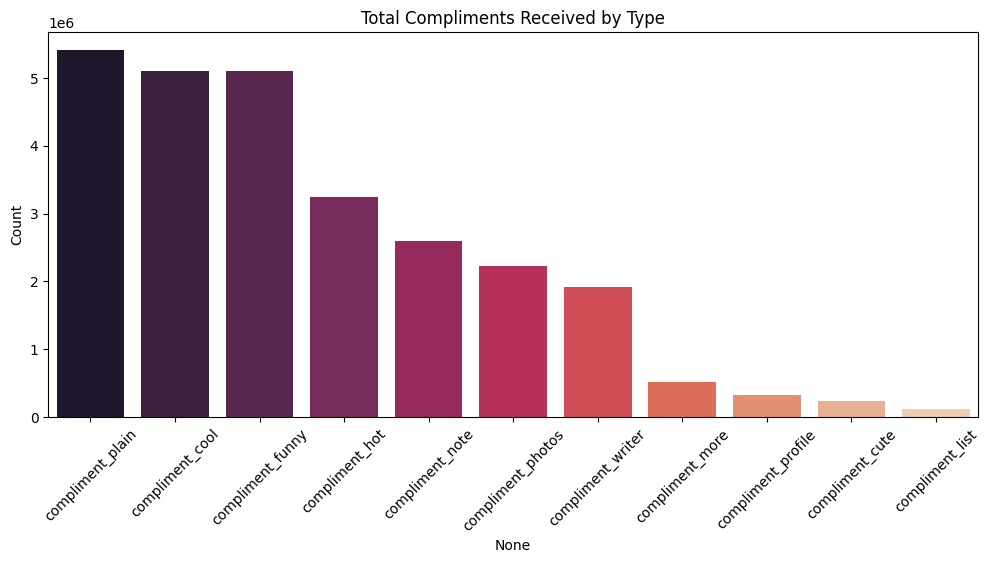

In [33]:
compliment_cols = [col for col in restaurant_user_df.columns if "compliment_" in col]

# Total compliments per type
compliments_sum = restaurant_user_df[compliment_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=compliments_sum.index, y=compliments_sum.values, palette="rocket")
plt.title("Total Compliments Received by Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

	•	Most common compliments are General or Cool: compliment_plain and compliment_cool are by far the most common. These are likely the default or most accessible types when users feel positive but don’t want to say much — almost like quick likes.
	•	Funny and Hot are next most used: compliment_funny and compliment_hot are also significant which suggests that users value humor and attractive presentation in reviews or profiles.
	•	Niche compliments are rare: compliment_writer, profile, cute, list are least used. These probably require more deliberate engagement (e.g., complimenting someone’s writing or curation style), so they happen less often.

##### **Check-in Data**

**Shape & Head**

In [34]:
print(f"Shape: {restaurant_checkin_df.shape}")
restaurant_checkin_df.head()

Shape: (51318, 2)


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
3,--8IbOsAAxjKRoYsBFL-PA,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015..."
4,--ZVrH2X2QXBFdCilbirsw,"2010-08-12 18:21:29, 2010-08-20 17:49:17, 2012..."


**Check-ins by Day of the Week**

In [36]:
# --> to explore hours and days
checkins_exploded = restaurant_checkin_df[["business_id", "date"]].dropna().copy()
checkins_exploded = checkins_exploded.assign(
    date=checkins_exploded["date"].str.split(',')
).explode("date")

checkins_exploded["date"] = pd.to_datetime(checkins_exploded["date"], errors='coerce')
checkins_exploded = checkins_exploded.dropna(subset=["date"])

<ipython-input-37-278683ee71cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkins_exploded["day_of_week"] = checkins_exploded["date"].dt.day_name()


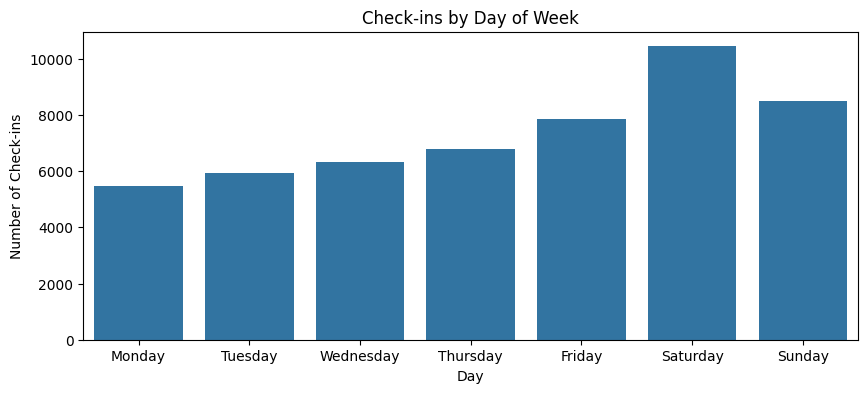

In [37]:
checkins_exploded["day_of_week"] = checkins_exploded["date"].dt.day_name()

plt.figure(figsize=(10, 4))
sns.countplot(data=checkins_exploded, x="day_of_week", order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
plt.title("Check-ins by Day of Week")
plt.ylabel("Number of Check-ins")
plt.xlabel("Day")
plt.show()

	•	Check-ins peak on weekends, especially Saturday, suggesting higher restaurant visits during leisure time
	•	There is a gradual increase in check-ins from Monday through Friday.

**Check-ins by Hour**

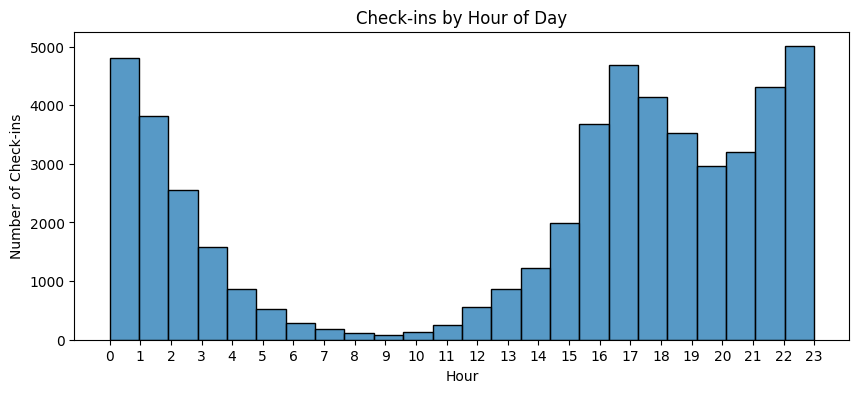

In [38]:
checkins_exploded["hour"] = checkins_exploded["date"].dt.hour

plt.figure(figsize=(10, 4))
sns.histplot(checkins_exploded["hour"], bins=24)
plt.title("Check-ins by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Check-ins")
plt.xticks(range(0, 24))
plt.show()

	•	Check-ins peak in the evening hours (5–11 PM), aligning with typical dining times.
	•	There's also a smaller surge just after midnight, possibly reflecting late-night dining or nightlife.

##### **Tip Data**

**Shape and Head**

In [39]:
print(f"Shape: {restaurant_tip_df.shape}")
restaurant_tip_df.head()

Shape: (649181, 5)


,user_id,business_id,text,date,compliment_count
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
1,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
2,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
3,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
4,trf3Qcz8qvCDKXiTgjUcEg,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi...",2012-03-13 04:00:52,0


**Tip Length Distribution**

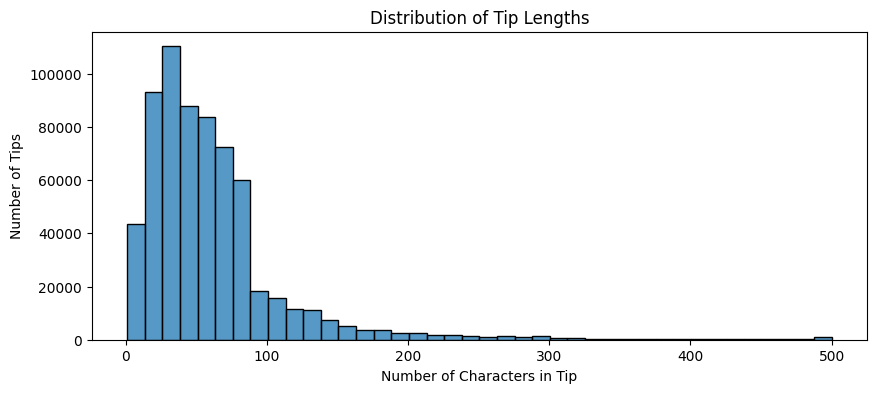

In [40]:
restaurant_tip_df["tip_length"] = restaurant_tip_df["text"].apply(len)

plt.figure(figsize=(10, 4))
sns.histplot(restaurant_tip_df["tip_length"], bins=40)
plt.title("Distribution of Tip Lengths")
plt.xlabel("Number of Characters in Tip")
plt.ylabel("Number of Tips")
plt.show()

	•	Most tips are short — peaking around 40–60 characters, with a long tail of a few longer tips.
	•	It’s heavily right-skewed, which is common for natural text data.
	•	This suggests that tips are often very brief, possibly one-line suggestions like “Try the pancakes!”

**Tip Activity Per Year**

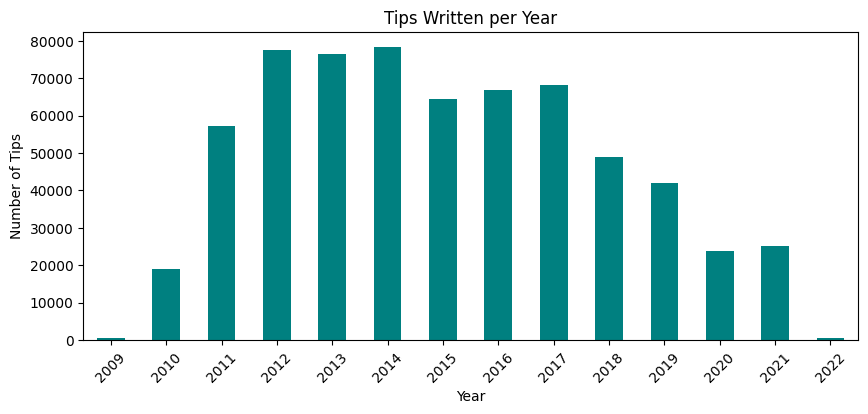

In [41]:
# Convert to datetime if not already
restaurant_tip_df["date"] = pd.to_datetime(restaurant_tip_df["date"])

# Plot tips per year
plt.figure(figsize=(10, 4))
restaurant_tip_df["date"].dt.year.value_counts().sort_index().plot(kind="bar", color='teal')
plt.title("Tips Written per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tips")
plt.xticks(rotation=45)
plt.show()

	•	Tip activity increased steadily until around 2014, peaking in that year.
	•	After 2017, tip frequency declined—possibly due to shifts in user behavior, or the availability of other applications that offer the same services as Yelp.
	•	The sharp drop in 2020–2021 is probably due to pandemic-related closures and reduced dining activity.